# Project Description
## Xiang Ding
In this project, we aim to explore the factors that may affect students' exam performance and understand how these factors relate to their grades. We will begin by visualizing the data on exam scores and grades to identify any patterns or trends. In the second part of the project, we will take a closer look at three key factors that may impact students' overall exam performance: standard lunch, parents' education level, and completion of exam preparation. To achieve this, we will use scikit learn to build a linear model to perform Multiple Linear Regression and examine the correlation between these variables and students' math scores. By the end of the project, we hope to gain a better understanding of how these factors contribute to students' academic success and identify potential areas for improvement.
##### Run the cell from top to bottom

In [101]:
#!pip install -U scikit-learn
#!pip install pandas
#!pip install numpy
#!pip install -U matplotlib

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_module import df_vis
from data_module import data_proc
from data_module import basic_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Read the CSV file

In [103]:
db = pd.read_csv('data/exams.csv')
# Uncomment to see the part of the dataframe
db.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,standard,none,94,84,84
1,female,group B,some high school,free/reduced,none,52,67,65
2,female,group E,high school,free/reduced,none,49,56,57
3,female,group E,some high school,free/reduced,none,57,46,47
4,male,group E,high school,standard,completed,91,82,79


### Part I: Data Visualization 
Factors: Parents education level, Free/reduced lunch, test preparation course

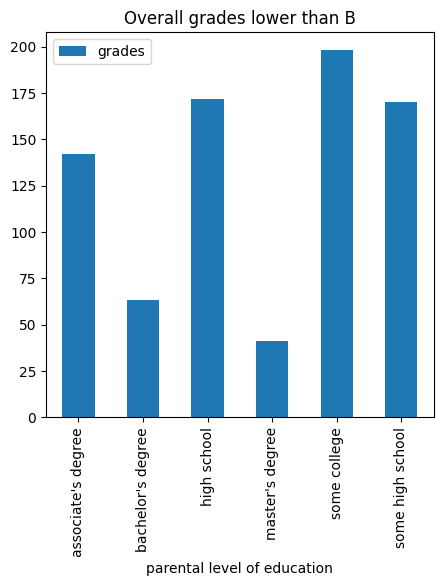

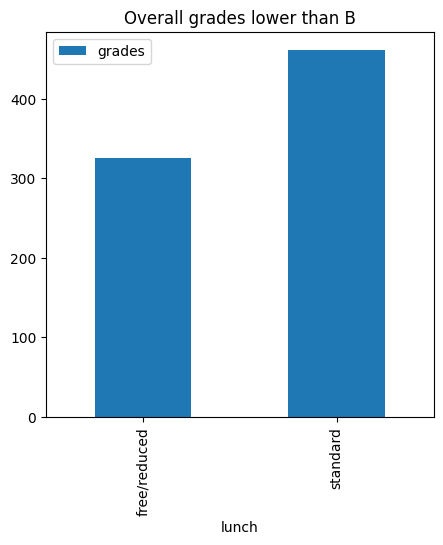

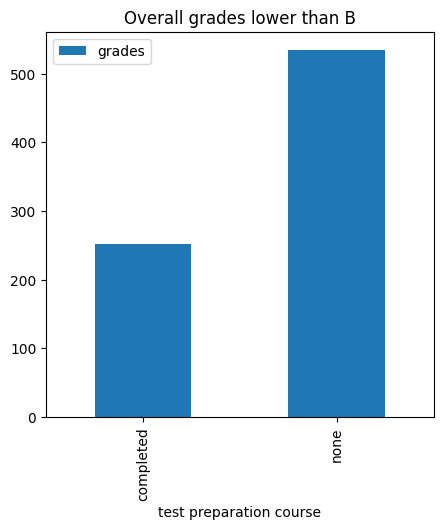

In [104]:
data_proc.grades_count(db, 'parental level of education')
data_proc.grades_count(db, 'lunch')
data_proc.grades_count(db, 'test preparation course')

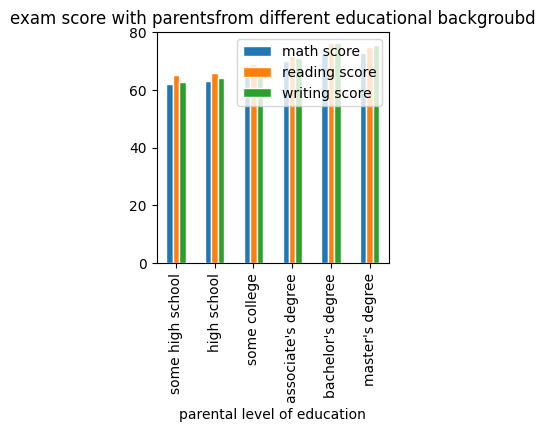

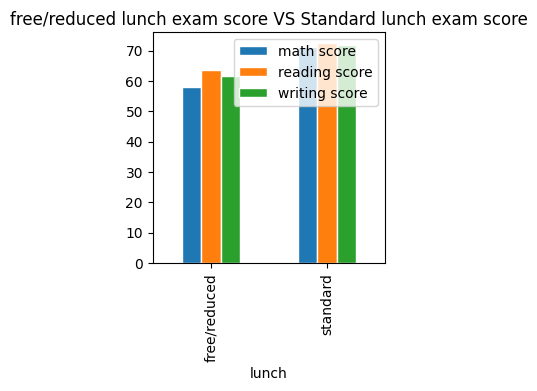

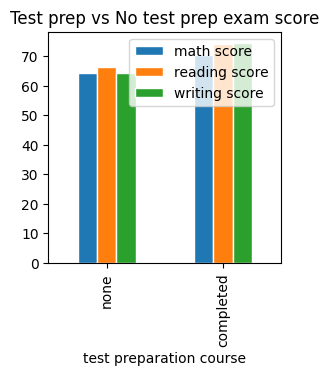

In [105]:
df_vis.parents_education_score(db)
df_vis.overall_lunch(db)
df_vis.test_prep(db)

From the analysis of the three factors' data visualizations above, it is evident that there may be a strong correlation between higher academic performance and certain factors. Specifically, students with standard lunch, parents with higher education, and those who have completed exam preparation tend to have higher average exam scores.

### Part II:

In the first step, I quantify the data in these categories. To quantify the parents' education background, Based on the plot above. I creater addiotnal columns to indicate of what columns each student's parent have with their education and use one hot encoding method. As for the second factor, school lunch, I assign a binary variable where a value of 1 indicates that the student receives a free school lunch, and 0 indicates that the student does not receive a free school lunch. Similarly, I follow the same procedure for exam preparation. And I have just standardize the score for wrting and reading
##### Create a new table with the quantify data

In [129]:

lablencode = LabelEncoder()
db['parental level of education'] = lablencode.fit_transform(db['parental level of education'])
db['gender'] = lablencode.fit_transform(db['gender'])
db['lunch'] = lablencode.fit_transform(db['lunch'])
db['test preparation course'] = lablencode.fit_transform(db['test preparation course'])
scaler = StandardScaler()
scaler.fit(db['reading score'].values.reshape(-1,1))
db['reading score'] = scaler.transform(db['reading score'].values.reshape(-1,1))
scaler.fit(db['writing score'].values.reshape(-1,1))
db['writing score'] = scaler.transform(db['writing score'].values.reshape(-1,1))
new_db = db.drop(columns=['race/ethnicity',"gender"])

new_db

,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,5,1,1,94,0.991044,1.014335
1,5,0,1,52,-0.156388,-0.205203
2,2,0,1,49,-0.898845,-0.718693
3,5,0,1,57,-1.573805,-1.360555
4,2,1,0,91,0.856052,0.693404
...,...,...,...,...,...,...
995,2,0,0,43,-1.438813,-1.681486
996,2,0,1,55,-0.426372,-0.718693
997,5,1,0,59,-0.021396,-0.461948
998,5,1,1,55,-1.033837,-1.167996


 In the second step, I divide the data into two parts: x_variables and y_variables. x_variables will represent the input variables that will be used in the regression model, while y_variables will represent the target variables.
 ##### Note: Since I am running mutiplie linear regressions, I do not need to stanardize my numbers, the model can take in raw data

In [210]:
x_var = new_db.drop(columns=[ "math score","parental level of education", "test preparation course"])
y_var = new_db["math score"]
# uncomment to see the dataframe
#x_var
#y_var

In the third step, I split the data into training and testing subsets using an 80/20 ratio. This means that 80% of the dataset will be used for training the linear regression model, while the remaining 20% will be used for testing. To accomplish this, we will be utilizing the train_test_split function from the sklearn.model_selection library.
##### But feel free to play around the data split percentage to see how the r^2 values changes with different split

In [211]:
x_train, x_test, y_train, y_test = basic_model.datasplit(x_var, y_var, train=0.8, test=0.2)

Use the data to train the sklearn.linear_model

In [212]:
model = basic_model.my_model()
model.fit(x_train, y_train)

LinearRegression()

Apply the trained model to make prediction on the training/test set and output the model stats.

In [213]:
score_predict_train = basic_model.score_predict_train(model, x_train, y_train)
score_predict_test = basic_model.score_predict_test(model, x_test, y_test)

Intercept: 63.22232573411106
Mean sqaured Error(MSE): 68.90592045947396
R^2: 0.7207264856208451
Intercept: 63.22232573411106
Mean sqaured Error(MSE): 66.54169247404484
R^2: 0.7286400519622535


### Output the equation of the linear model and the model's prediction graph
Pe = lunch, l = writing score, ep = reading score

predicted_y = 63.22232573411106 + 5.246932537761352PE +8.823008958258834l + 3.842855848926425ep


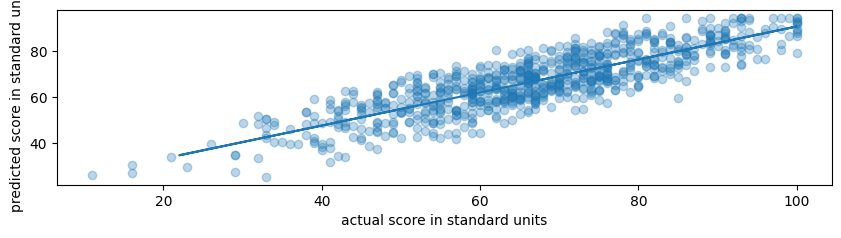

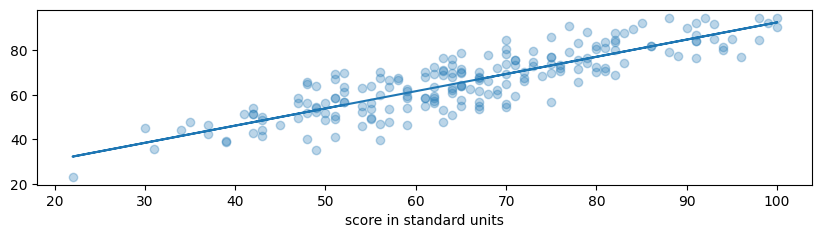

In [214]:
basic_model.linear_eq(model)
df_vis.predict_model(y_train, score_predict_train, y_test)
df_vis.actual(score_predict_test, y_test)

### Analysis
Based on my analysis, the linear model I built did accurately predict students' math scores. The model had MSE of 66 actual and R^2 values of 0.72, indicating that the variables we examined - writing score, school lunch, and reading score - did have a significant impact on math score performance. These results suggest that with these three factors we can account roughly 72 percent of variance of math score in this dataset.

In [ ]:
!pytest

## Extra Credits
I belived I have really challenged myself by exploring and utilizing various libraries, including Pandas and Matplotlib, to manipulate data and generate insightful visualizations. However, the most exhilarating part has been diving into the world of machine learning with Scikit-Learn. By delving into the mathematics behind linear regression models and researching various online articles, I've gained a deeper understanding of the mechanics behind the model and how to effectively apply it to my datasets. Moreover, This project has also been uploaded on github as well https://github.com/fanhh/examdata_prediction